# Lab 8
### Seg 3 - Kmeans - Hough

threshold_otsu: http://scikit-image.org/docs/dev/api/skimage.filters.html
                Good Visualization here: https://en.wikipedia.org/wiki/Otsu%27s_method
                
                

In [2]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
Example
Array Indexing important note
'''
x= np.arange(10,0,-1)
indexesArray = np.array([3, 3, 1, 8])
print(x)
print(indexesArray)
print(x[indexesArray])
# Try it if x 

[10  9  8  7  6  5  4  3  2  1]
[3 3 1 8]
[7 7 9 2]


In [7]:
'''
@TODO
Requirement
Try the same concept on multidimensional array x
Don't forget to convert x to numpy array
'''
x = np.random.randn(10,10)               
print(x[indexesArray])
print(x[0,index])




[[-0.02079228 -0.6924344  -0.5167553  -0.12025634 -1.21510532  0.3127703
   0.22780245  0.12157829 -0.33855422 -0.1220357 ]
 [ 0.05416844  0.16830094  0.21661602 -0.16754119 -0.50288972 -0.89023815
  -0.59466285  0.62220393 -0.70838489  0.69321442]
 [-1.1190888   1.52843403 -1.68581848  0.700679    0.0456139   0.28170303
  -0.32111427  0.56253     0.6898193  -0.58339065]
 [-0.52614732  0.70040497 -0.06795226 -0.61878827  1.42015664 -0.92516891
   1.51746446 -0.96182306 -0.20698311 -0.94734831]
 [-0.69584039  0.62644076  1.07692518 -0.81827821  1.04430977  0.14768383
  -1.23600814 -1.76935103  1.2610608  -0.33573863]
 [-0.50952765  0.99804662 -0.39579242 -0.4268109   0.80866621 -1.59733887
  -0.91519625  1.18789701 -0.5192657  -0.31787558]
 [ 1.2198549  -0.977883    0.68424385 -0.09393537  0.48925017  1.14884616
   0.73257847 -1.18913268 -0.26919575  0.83196924]
 [ 1.47054847  0.44625046  1.45364904 -0.23729685  0.3957819  -2.49826052
  -1.44268512  0.54039864 -1.23208105  0.23356484]
 

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


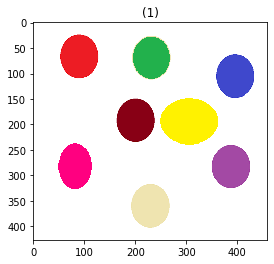

[[2.54985702e+02 2.54976680e+02 2.54971652e+02]
 [1.63061305e+02 7.33455549e+01 1.63880544e+02]
 [2.38014104e+02 2.25610656e+02 1.77438273e+02]
 [2.45605590e+02 1.44680124e+01 8.00203934e+01]
 [2.55000000e+02 2.42000000e+02 4.46220838e-12]
 [3.40000000e+01 1.77000000e+02 7.60000000e+01]
 [6.28454654e+01 7.18498409e+01 2.03925815e+02]
 [1.35882728e+02 5.41483845e-01 2.08386518e+01]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


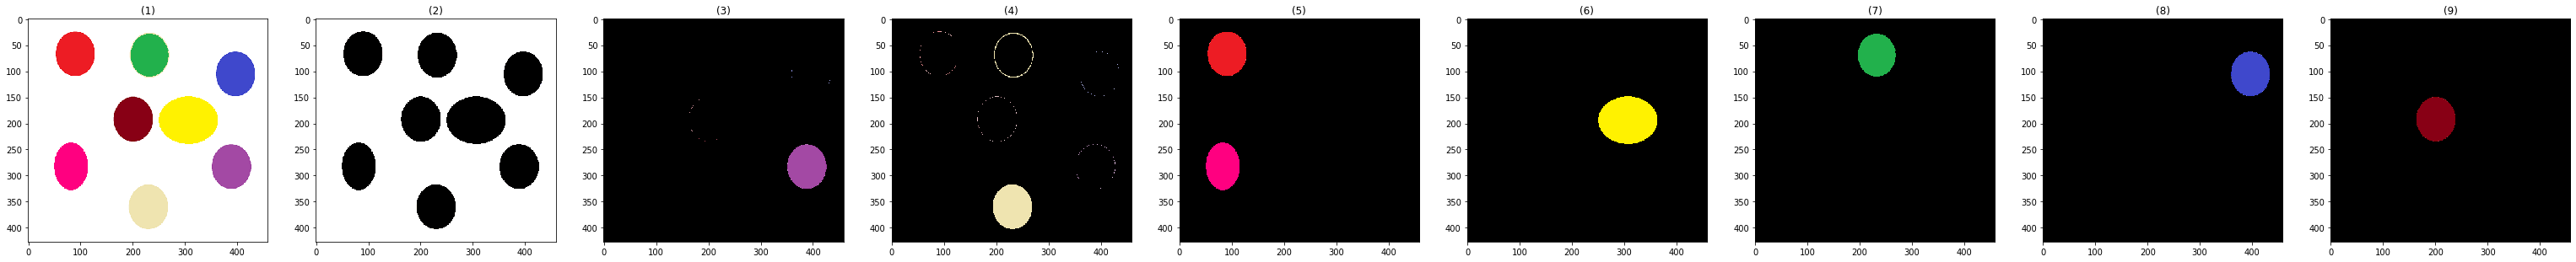

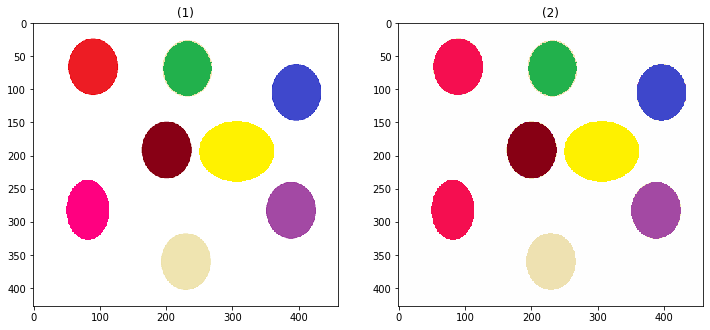

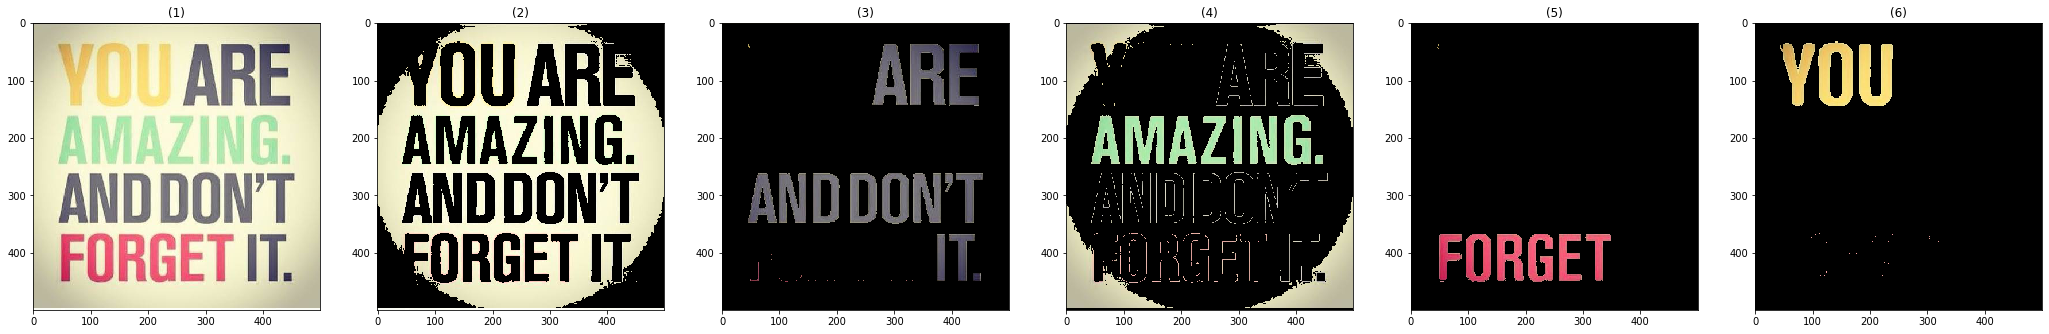

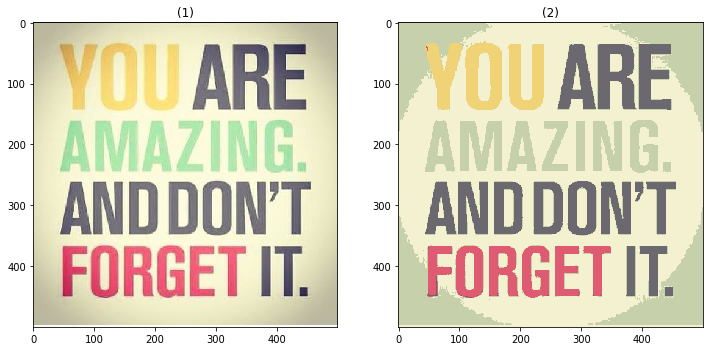

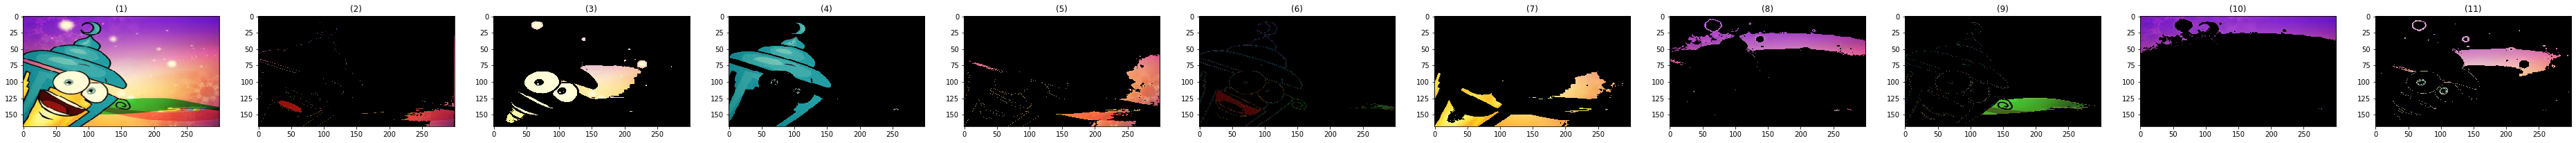

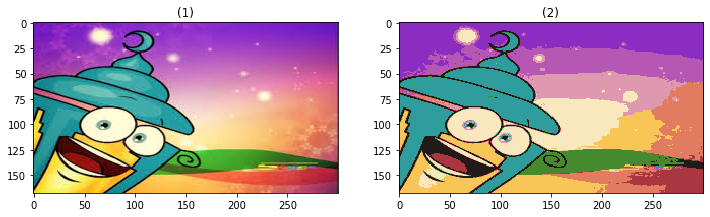

In [8]:
image = io.imread('balls.jpg')
[x, y, z ]= image.shape
img2d = image.reshape(x*y, z)
show_images([image])
## TODO: Construct kmeans object using cluster.KMeans with appropriate n_clusters

cluster1 = cluster.KMeans(8)
rmeans = cluster1.fit(img2d)

## TODO: Fit the kmeans object with the data of the image


'''

TODO : use the attributes 
        ".cluster_centers_" to get the center of the RGB color to use per segment 
                             [I.e: contains the colors of the new segments]
        ".labels_": to get the label for each pixel of the input.
 Hint: print the shape of the output to understand it clearly.
'''
centers, labels = rmeans.cluster_centers_, rmeans.labels_
labels = labels.reshape(x,y)
print(centers, labels.reshape(x,y))
'''

TODO: For each label replace it with the corresponding RGB color according to the cluster_centers, cluster_labels
Hint: Use the same concept shown above


Reshape the image to be on the original shape
Show the original and the segmented image


'''
images = [image]
image2=np.copy(image)
#image2[labels==[0,1,2,3,4,5,6,7,8],:]=centers[[0,1,2,3,4,5,6,7,8],:]
for i in range(0,8):
    a = np.copy(image)
    a[labels != i,:] = 0
    image2[labels==i,:]=centers[i,:]
    images.append(a)
show_images(images)
show_images([image,image2])



image = io.imread('amazing.jpg')
[x, y, z ]= image.shape

img2d = image.reshape(x*y, z)
cluster1 = cluster.KMeans(5)
rmeans = cluster1.fit(img2d)
centers, labels = rmeans.cluster_centers_, rmeans.labels_
labels = labels.reshape(x,y)

images = [image]
image2=np.copy(image)
#image2[labels==[0,1,2,3,4,5,6,7,8],:]=centers[[0,1,2,3,4,5,6,7,8],:]
for i in range(0,5):
    a = np.copy(image)
    a[labels != i,:] = 0
    image2[labels==i,:]=centers[i,:]
    images.append(a)
show_images(images)
show_images([image,image2])


image = io.imread('colors.jpg')
[x, y, z ]= image.shape

img2d = image.reshape(x*y, z)
cluster1 = cluster.KMeans(10)
rmeans = cluster1.fit(img2d)
centers, labels = rmeans.cluster_centers_, rmeans.labels_
labels = labels.reshape(x,y)

images = [image]
image2=np.copy(image)
#image2[labels==[0,1,2,3,4,5,6,7,8],:]=centers[[0,1,2,3,4,5,6,7,8],:]
for i in range(0,10):
    a = np.copy(image)
    a[labels != i,:] = 0
    image2[labels==i,:]=centers[i,:]
    images.append(a)
show_images(images)
show_images([image,image2])


0.6612442440257353


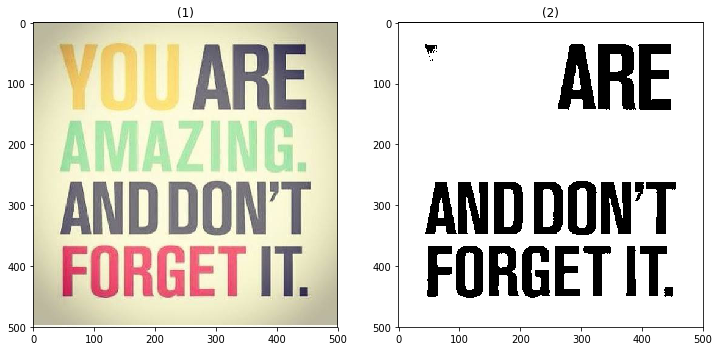

In [135]:
'''

@TODO:
This experiment should be done on Gray scale and on one channel of RGB or HSV

use threshold_otsu to get the threshold that should be used to divide the values.
'''
image = io.imread("amazing.jpg")
imageg = rgb2gray(image) 
threshold=threshold_otsu(imageg)
print(threshold)
imageg[imageg<threshold]=0
imageg[imageg>=threshold]=1
show_images([image,imageg])


244


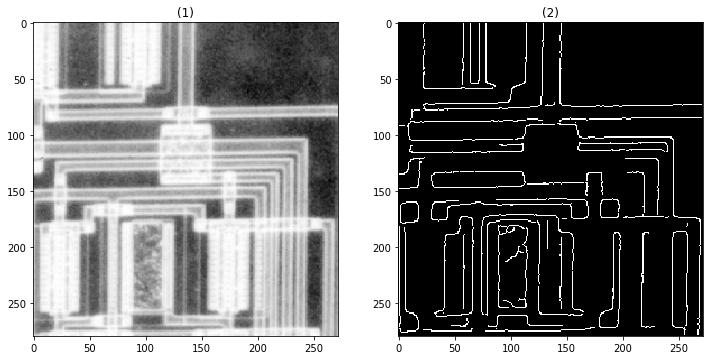

[189 177 150 141 138 135 112 107  96  95]
[ 1.55324553  1.55324553  0.0087754  -0.0087754  -0.0087754   1.55324553
  1.57079633  1.55324553  0.0087754   0.0087754 ]
[ 89.61459667  78.60051216 246.815621    64.58258643  72.59282971
 117.65044814 275.85275288 106.63636364   3.50448143 128.66453265]


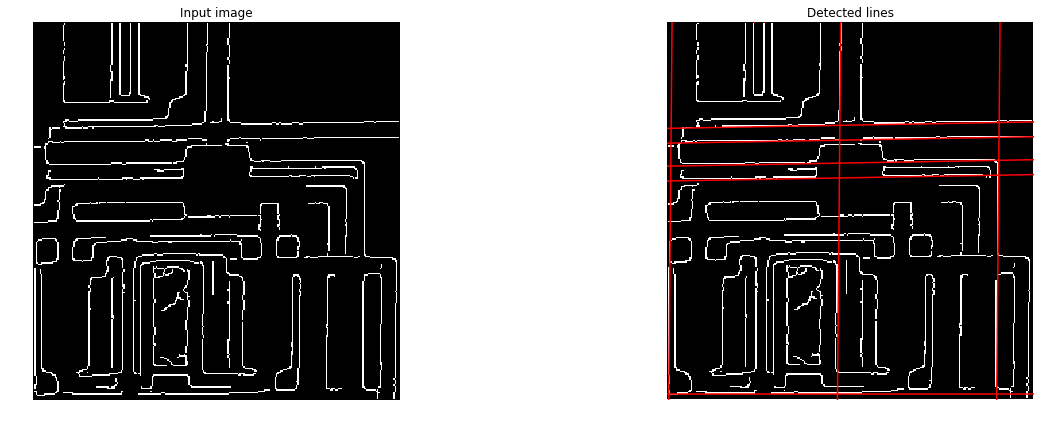

In [122]:
import numpy as np


def drawLine(ax,angle, dist):
    '''
    This function should draw the lines, given axis(ax), the angle and the distance parameters
    
    TODO:
    Get x1,y1,x2,y2
    '''
    x2 = 0
    y2 = dist/np.sin(angle)
    
    y1 = 0
    x1 = dist/np.cos(angle)
    
    # This line draws the line in red
    
    ax[1].plot((x1, y1), (x2, y2), '-r')

'''TODO: 
1- Read image
2- Get edges using Canny.
3- Show image and edges side-by-side.
4- Call hough lines on edges and get the results (houghSpace,angles, distances)
5- Get Hough Line Peaks with different thresholds: the default threshold is 0.5 *max(hspace)
* What is the effect of the threshold?
* What is the meaning of the outputs of hough_line,hough_line_peak? Hint:print them.
* Why do we use canny before hough?!
'''
image = io.imread("circuit.tif")
image = rgb2gray(image) * 255
print(np.max(image))
edges = canny(image, sigma = 2)
show_images([image, edges])
image = edges
houghSpace,angles, distances = hough_line(edges)

threshold=0.003*np.max(houghSpace)

accum, angles, dists = hough_line_peaks(houghSpace,angles,distances, int(threshold))

print(accum)
print(angles)
print(dists)


## This part draw the lines on the image.

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()


ax[1].imshow(image, cmap=cm.gray)
for angle, dist in zip(angles,dists):
    drawLine(ax,angle, dist)
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

plt.tight_layout()
plt.show()

